## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [3]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [5]:
for column in df.columns:
    if df.dtypes[column]==object:
        print(column + ': ' + str((df[column].str.strip()=='?').sum()))

workclass: 1836
education: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
native-country: 583
target: 0


Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [6]:
print('Occupation nans in same row as workclass with a nan: ' + str(((df['occupation'].str.strip()=='?') & (df['workclass'].str.strip()=='?')).sum()))
print('Native-country nans in same row as workclass with a nan: ' + str(((df['native-country'].str.strip()=='?') & (df['workclass'].str.strip()=='?')).sum()))

Occupation nans in same row as workclass with a nan: 1836
Native-country nans in same row as workclass with a nan: 27


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

<ipython-input-7-cd5122386159>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][0].set_xticklabels(df[categorical_features[0]].value_counts().index.values,rotation=90)
<ipython-input-7-cd5122386159>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][1].set_xticklabels(df[categorical_features[1]].value_counts().index.values,rotation=90)
<ipython-input-7-cd5122386159>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][2].set_xticklabels(df[categorical_features[2]].value_counts().index.values,rotation=90)
<ipython-input-7-cd5122386159>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][3].set_xticklabels(df[categorical_features[3]].value_counts().index.values,rotation=90)
<ipython-input-7-cd5122386159>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1][0].set_xticklabels(df[categorical_features[4]].value_co

Text(0.5, 0.98, 'Categorical Plotting')

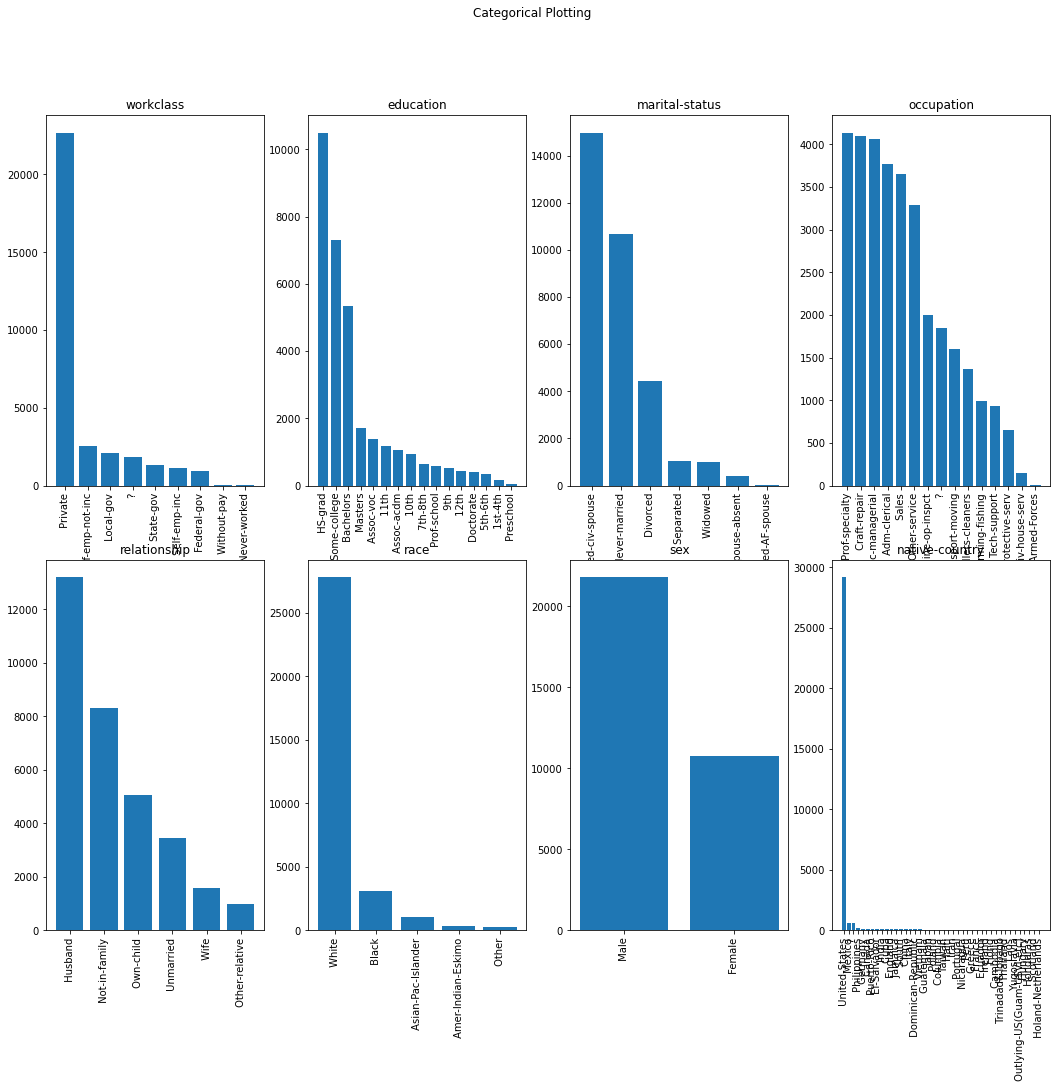

In [7]:
#plot the categroical columns to see what we are dealing with
categorical_features = [column for column in df.columns if df.dtypes[column]==object]
fig, axs = plt.subplots(2, 4, figsize=(18, 15))
axs[0][0].set_xticklabels(df[categorical_features[0]].value_counts().index.values,rotation=90)
axs[0][0].set_title(categorical_features[0])
axs[0][0].bar(df[categorical_features[0]].value_counts().index.values, df[categorical_features[0]].value_counts().values)

axs[0][1].set_xticklabels(df[categorical_features[1]].value_counts().index.values,rotation=90)
axs[0][1].set_title(categorical_features[1])
axs[0][1].bar(df[categorical_features[1]].value_counts().index.values, df[categorical_features[1]].value_counts().values)

axs[0][2].set_xticklabels(df[categorical_features[2]].value_counts().index.values,rotation=90)
axs[0][2].set_title(categorical_features[2])
axs[0][2].bar(df[categorical_features[2]].value_counts().index.values, df[categorical_features[2]].value_counts().values)

axs[0][3].set_xticklabels(df[categorical_features[3]].value_counts().index.values,rotation=90)
axs[0][3].set_title(categorical_features[3])
axs[0][3].bar(df[categorical_features[3]].value_counts().index.values, df[categorical_features[3]].value_counts().values)

axs[1][0].set_xticklabels(df[categorical_features[4]].value_counts().index.values,rotation=90)
axs[1][0].set_title(categorical_features[4])
axs[1][0].bar(df[categorical_features[4]].value_counts().index.values, df[categorical_features[4]].value_counts().values)

axs[1][1].set_xticklabels(df[categorical_features[5]].value_counts().index.values,rotation=90)
axs[1][1].set_title(categorical_features[5])
axs[1][1].bar(df[categorical_features[5]].value_counts().index.values, df[categorical_features[5]].value_counts().values)

axs[1][2].set_xticklabels(df[categorical_features[6]].value_counts().index.values,rotation=90)
axs[1][2].set_title(categorical_features[6])
axs[1][2].bar(df[categorical_features[6]].value_counts().index.values, df[categorical_features[6]].value_counts().values)

axs[1][3].set_xticklabels(df[categorical_features[7]].value_counts().index.values,rotation=90)
axs[1][3].set_title(categorical_features[7])
axs[1][3].bar(df[categorical_features[7]].value_counts().index.values, df[categorical_features[7]].value_counts().values)

fig.suptitle('Categorical Plotting')

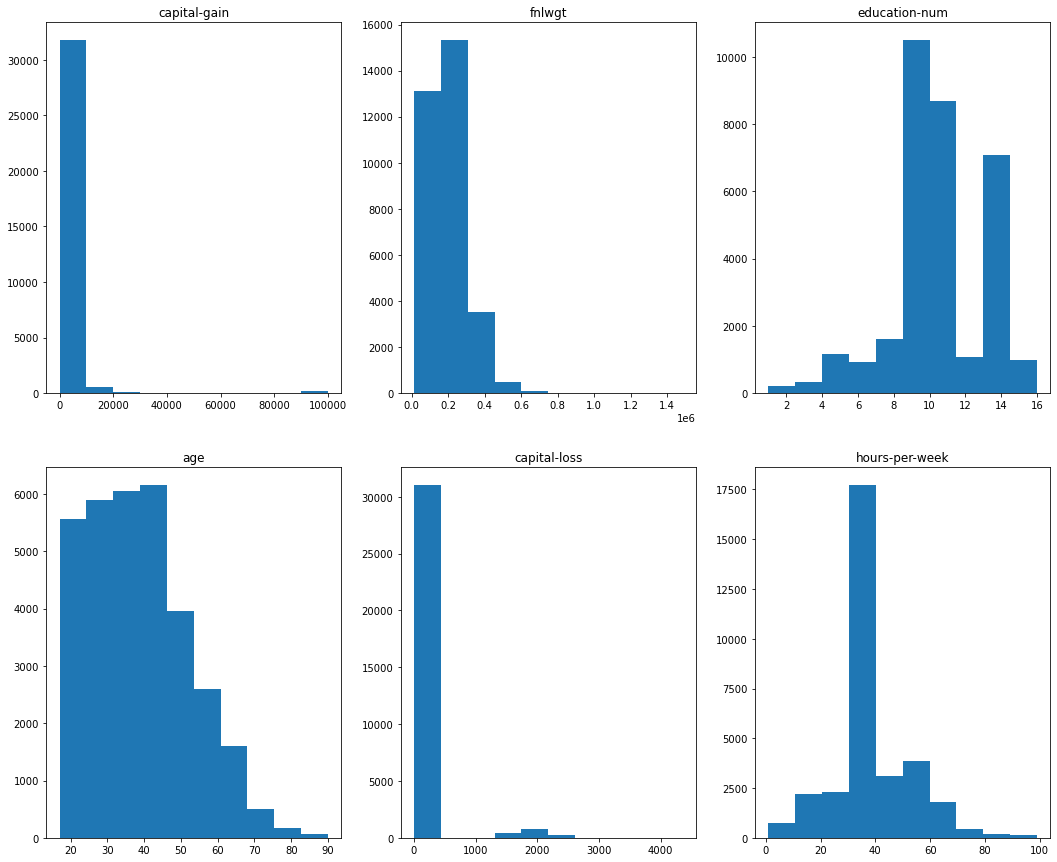

In [165]:
#plot the numerical columns
import math
#plot the categroical columns to see what we are dealing with
categorical_features = [column for column in df.columns if df.dtypes[column]=='int64']
fig, axs = plt.subplots(2, 3, figsize=(18, 15))
for i,var in enumerate(categorical_features):
    axs[math.floor((i-0.1)/3)][i-3*int(i/3)].set_title(var)
    axs[math.floor((i-0.1)/3)][i-3*int(i/3)].hist(df[var],bins=10)

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [8]:
#train / test... you know the drill
df_dropped = df[df['workclass'].str.strip()=='?']
import scipy.stats as stats
stats.ttest_ind(df['target'],df_dropped['target'])

Ttest_indResult(statistic=2.6951522246038815, pvalue=0.007039066835811254)

# Discussion of results